In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from task_3_core.som import SOM 

from setup import get_task_data

EPOCHS = 100

In [4]:
df = pd.read_csv(get_task_data('Iris.csv'))
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
119,120,6.0,2.2,5.0,1.5,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [5]:
labels = df['Species']

df = df.drop(['Species', 'Id'], axis=1)
df = (df - df.min()) / (df.max() - df.min())
df['Species'] = labels

df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
117,0.944444,0.750000,0.966102,0.875000,Iris-virginica
123,0.555556,0.291667,0.661017,0.708333,Iris-virginica
28,0.250000,0.583333,0.067797,0.041667,Iris-setosa
78,0.472222,0.375000,0.593220,0.583333,Iris-versicolor
73,0.500000,0.333333,0.627119,0.458333,Iris-versicolor


In [6]:
def plot_map(som, data):
    fig, ax = plt.subplots(figsize=(5, 5))

    class_styles = {
        'Iris-setosa' : 's',
        'Iris-versicolor': '*',
        'Iris-virginica': 'v',
    }

    for flower in class_styles:
        points_xs = data[data['Species'] == flower]['SepalLengthCm'].to_numpy()
        points_ys = data[data['Species'] == flower]['PetalLengthCm'].to_numpy()

        ax.scatter(points_xs, points_ys, marker=class_styles[flower])


    nodes = list(map(lambda n: list(n.position), som.nodes))
    nodes_xs = [x for x, _ in nodes]
    nodes_ys = [y for _, y in nodes]

    ax.scatter(nodes_xs, nodes_ys, color='black', s=3)

    for node in som.nodes:
        start_pos = list(node.position)
        for neighbor in node.neighbors:
            end_pos = list(neighbor.position)
            plt.plot(*np.transpose([start_pos, end_pos]), color='black')

    plt.show()

Kohonen map can be used as a clusterizer or as a non-linear analogue of PCA. 

It will be shown as a clusterizer on a subset of 2D data with visual representation and as a mapping on full 4D data of iris dataset and then analyzed in terms of mapping quality.  

In [13]:
subset_2d = df[['SepalLengthCm', 'PetalLengthCm', 'Species']]

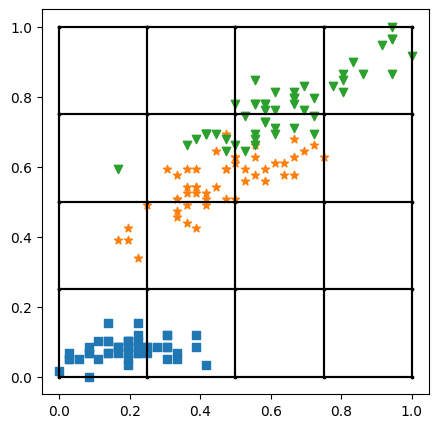

In [14]:
kohonen_map_2d = SOM((5, 5), 2, a0=0.025, s0=0.1)
plot_map(kohonen_map_2d, subset_2d)

In [15]:
input_data = subset_2d.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,PetalLengthCm
60,0.194444,0.423729
132,0.583333,0.779661
107,0.833333,0.898305
30,0.138889,0.101695
93,0.194444,0.389831


In [16]:
kohonen_map_2d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

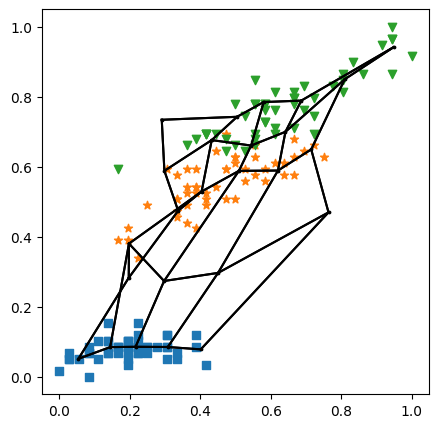

In [9]:
plot_map(kohonen_map_2d, subset_2d)

In [10]:
kohonen_map_2d.score()

Quantization error: 0.002205585853419121
Topographic error: 0.0


A quantization error of 0.0022 is relatively low, indicating that the SOM has done a good job in preserving the spatial relationships of the input data. Lower quantization errors generally suggest a more faithful representation of the input data.

A topographic error of 0.0 is ideal. It suggests that the SOM has preserved the topological relationships perfectly, meaning that neighboring inputs in the input space are also neighbors on the map.

Tuning for best shape:

In [17]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 2, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.01879172663606944
Topographic error: 0.0


3:
Quantization error: 0.007630604129919337
Topographic error: 0.0


4:
Quantization error: 0.002695165893234203
Topographic error: 0.0


5:
Quantization error: 0.001955086730259747
Topographic error: 0.0


6:
Quantization error: 0.001566520776988174
Topographic error: 0.0


7:
Quantization error: 0.0012113184057340252
Topographic error: 0.0


8:
Quantization error: 0.0010940732640101747
Topographic error: 0.0


KeyboardInterrupt: 

As the map size increases (x from 2 to 10), the quantization error generally decreases.
The quantization error is a measure of how well the SOM represents the input data. A lower quantization error is equal to a better representation.
The topographic error remains consistently 0.0, suggesting that the spatial relationships in the input data are well preserved in the map for all tested sizes.

Smaller map sizes (e.g., 2x2) result in higher quantization errors, indicating that the map might not capture the input data's complexity.
As the map size increases, the quantization error decreases, suggesting that a larger map can better represent the input data.
However, it's crucial to keep balance, as very large maps might lead to overfitting or computational inefficiency.

Based on the results, in our case the best size for us would be either 7x7 or 8x8. It provides a good balance between capturing the input data's structure (low quantization error) and computational efficiency.

Tuning for best learning rate

Learning Rate (0.025):
Quantization error: 0.0012060190386170794
Topographic error: 0.0


Learning Rate (0.0025):
Quantization error: 0.0016696698753531664
Topographic error: 0.0


Learning Rate (0.03):
Quantization error: 0.0011545552794012264
Topographic error: 0.0


Learning Rate (0.05):
Quantization error: 0.0010730768688724792
Topographic error: 0.0


Learning Rate (0.1):
Quantization error: 0.0010716633399224604
Topographic error: 0.0


Learning Rate (0.5):
Quantization error: 0.0012210697839870413
Topographic error: 0.0


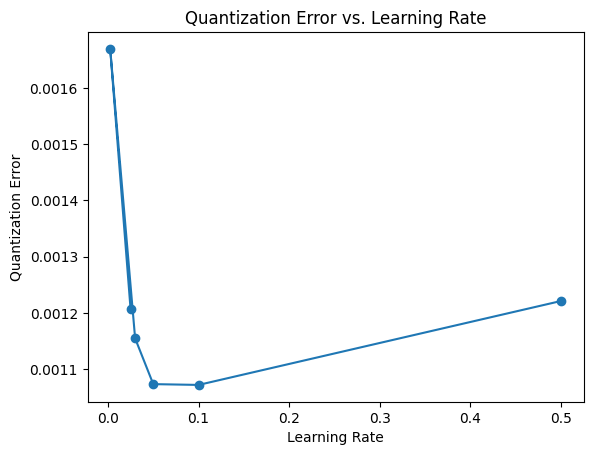

In [19]:
learning_rates = [0.025, 0.0025, 0.03, 0.05, 0.1, 0.5]
quantization_errors = []

for x in learning_rates:
    kohonen_map = SOM((8, 8), 2, a0=x, s0=0.5 / 8)  
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    quantization_error = kohonen_map.quantization_error()
    quantization_errors.append(quantization_error)

    print(f'Learning Rate ({x}):')
    kohonen_map.score()
    print('\n\n')

plt.plot(learning_rates, quantization_errors, marker='o')
plt.title('Quantization Error vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Quantization Error')
plt.show()

As we can see, picking size of map as 8x8, we found the local minimum for learning rate, its near 0.04-0.1 (an elbow of this chart).
Summarizing, both size of SOM and learning rate have significant impact on model's performance.

Mapping 4D:

In [7]:
kohonen_map_4d = SOM((5, 5), 4, a0=0.025 , s0=0.1)

In [8]:
input_data = df.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
111,0.583333,0.291667,0.728814,0.750000
26,0.194444,0.583333,0.101695,0.125000
72,0.555556,0.208333,0.661017,0.583333
93,0.194444,0.125000,0.389831,0.375000
34,0.166667,0.458333,0.084746,0.000000


In [9]:
kohonen_map_4d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

In [10]:
kohonen_map_4d.score()

Quantization error: 0.01431379933994662
Topographic error: 0.0


Tuning for best shape:

In [16]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 4, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.05394521099653818
Topographic error: 0.0


3:
Quantization error: 0.04567645341499697
Topographic error: 0.0


4:
Quantization error: 0.023877788891522044
Topographic error: 0.0


5:
Quantization error: 0.0166086977154709
Topographic error: 0.0


6:
Quantization error: 0.015023649928194192
Topographic error: 0.0


7:
Quantization error: 0.013664665894976355
Topographic error: 0.0


8:
Quantization error: 0.011992733784067679
Topographic error: 0.0


9:
Quantization error: 0.01139590881926625
Topographic error: 0.0


10:
Quantization error: 0.010604206228465045
Topographic error: 0.0
